In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train = x_train.reshape((-1,28,28,1)).astype('float32')/255
x_test = x_test.reshape((-1,28,28,1)).astype('float32')/255

In [4]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [5]:
hist= model.fit(x_train, y_train, epochs=50, batch_size=12000, validation_data=(x_test, y_test))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 780ms/step - accuracy: 0.1094 - loss: 2.2994 - val_accuracy: 0.3490 - val_loss: 2.2732
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.2249 - loss: 2.2644 - val_accuracy: 0.3902 - val_loss: 2.1855
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.3128 - loss: 2.1664 - val_accuracy: 0.4451 - val_loss: 1.9654
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.3978 - loss: 1.9406 - val_accuracy: 0.5846 - val_loss: 1.5512
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.4882 - loss: 1.5754 - val_accuracy: 0.6955 - val_loss: 1.1162
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.5810 - loss: 1.2393 - val_accuracy: 0.7626 - val_loss: 0.8214
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.6805 - loss: 0.9642 - val_accuracy: 0.7972 - val_loss: 0.6662
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.7471 - loss: 0.7896 - val_accuracy: 0.8246 - val_loss

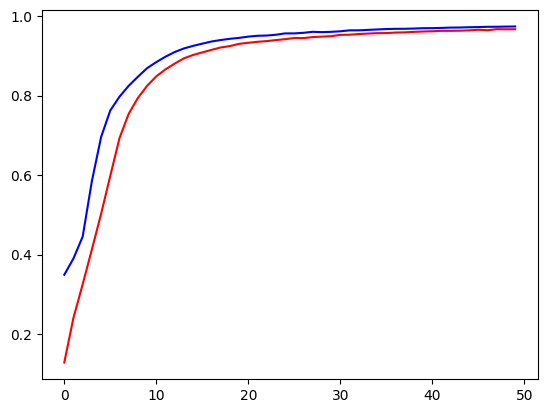

In [6]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], color='red')
plt.plot(hist.history['val_accuracy'], color='blue')

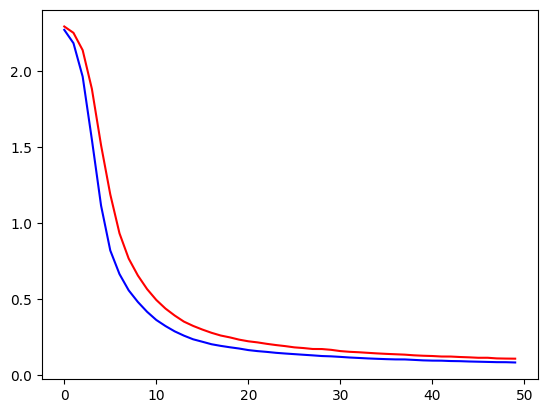

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')